# Import libraries and packages

In [1]:
import os
import pandas as pd
from matplotlib import pyplot as plt
import numpy as np
import missingno as msno
from fasteda import fast_eda
import seaborn as sns
from scipy import stats

# Import and load datasets

These datasets have been retrieved on Kaggle at the following [link](https://www.kaggle.com/datasets/fardifaalam170041060/champions-league-dataset-1955-2023).

In [2]:
path=os.getcwd()
file_performances='UCL_AllTime_Performance_Table.csv'
file_finals='UCL_Finals_1955-2023.csv'

In [3]:
all_time=pd.read_csv(path+os.sep+file_performances)
finals=pd.read_csv(path+os.sep+file_finals)

# Exploring datasets

In [4]:
all_time.head()

,#,Team,M.,W,D,L,goals,Dif,Pt.
0,1.0,Real Madrid,486,291,85,110,1076:55:00,533,533
1,2.0,Bayern Munich,388,231,78,79,817:24:00,427,427
2,3.0,FC Barcelona,341,196,77,68,675:51:00,319,319
3,4.0,Manchester United,289,153,69,67,524:56:00,224,224
4,5.0,Juventus,297,151,68,78,472:57:00,171,171


In [5]:
all_time.shape

(354, 9)

In [6]:
all_time.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 354 entries, 0 to 353
Data columns (total 9 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   #       333 non-null    float64
 1   Team    354 non-null    object 
 2   M.      354 non-null    int64  
 3   W       354 non-null    int64  
 4   D       354 non-null    int64  
 5   L       354 non-null    int64  
 6   goals   354 non-null    object 
 7   Dif     354 non-null    int64  
 8   Pt.     354 non-null    int64  
dtypes: float64(1), int64(6), object(2)
memory usage: 25.0+ KB


In [7]:
finals.head()

,Season,Country,Winners,Score,Runners-up,Country.1,Venue,Attend­ance,Notes
0,1955–56,Spain,Real Madrid,4–3,Reims,France,"Parc des Princes, Paris, France","38,239",NaN
1,1956–57,Spain,Real Madrid,2–0,Fiorentina,Italy,"Santiago Bernabéu, Madrid, Spain","124,000",NaN
2,1957–58,Spain,Real Madrid,3–2,AC Milan,Italy,"Heysel Stadium, Brussels, Belgium","67,000",Match was won during extra time
3,1958–59,Spain,Real Madrid,2–0,Reims,France,"Neckarstadion, Stuttgart, West Germany","72,000",NaN
4,1959–60,Spain,Real Madrid,7–3,Eintracht Frankfurt,West Germany,"Hampden Park, Glasgow, Scotland","127,621",NaN


In [8]:
finals.shape

(69, 9)

In [9]:
finals.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 69 entries, 0 to 68
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   Season       69 non-null     object
 1   Country      69 non-null     object
 2   Winners      69 non-null     object
 3   Score        69 non-null     object
 4   Runners-up   69 non-null     object
 5   Country.1    69 non-null     object
 6   Venue        69 non-null     object
 7   Attend­ance  69 non-null     object
 8   Notes        18 non-null     object
dtypes: object(9)
memory usage: 5.0+ KB


# Data cleaning and formatting

## Missing values

<AxesSubplot:>

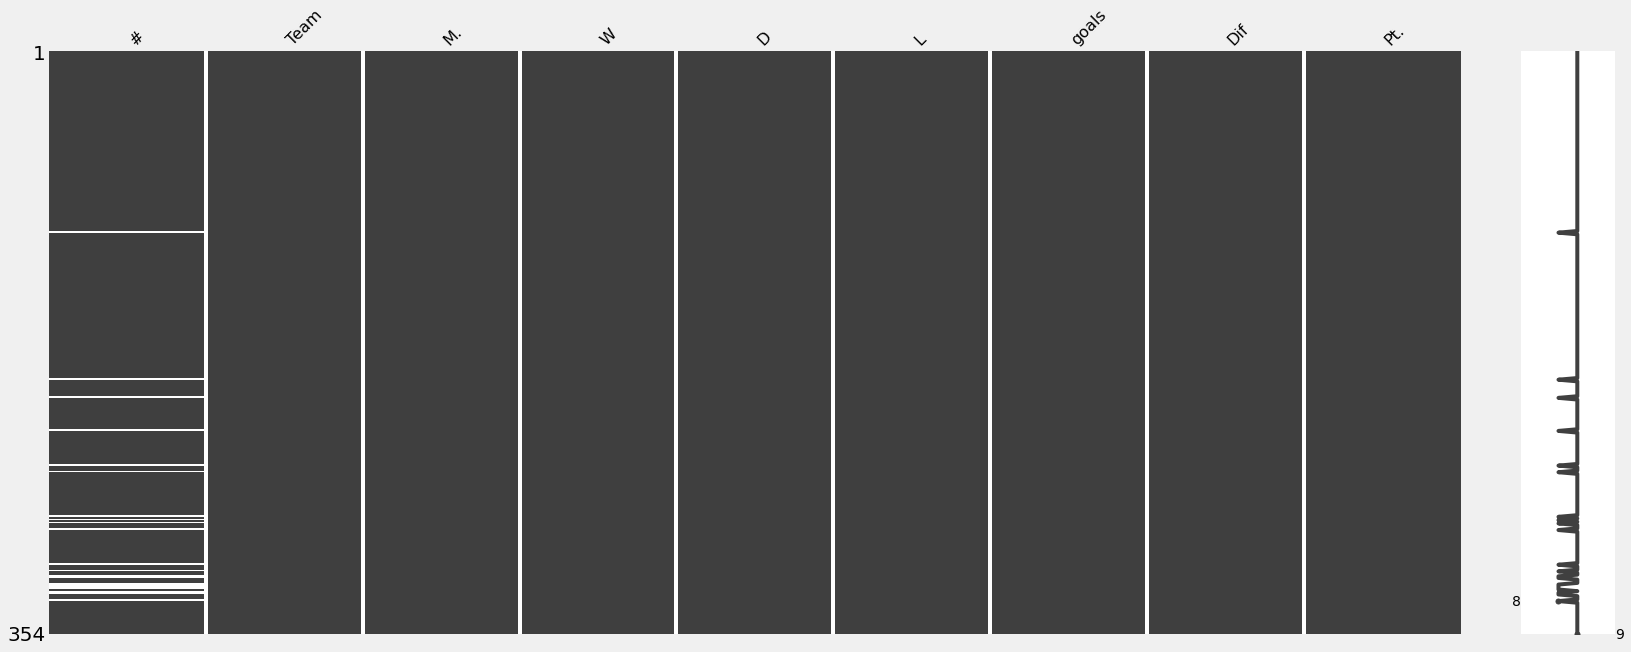

In [10]:
msno.matrix(all_time)

Since column "#" is useless and not informative we can drop it.

In [11]:
all_time.drop('#',axis=1,inplace=True)

<AxesSubplot:>

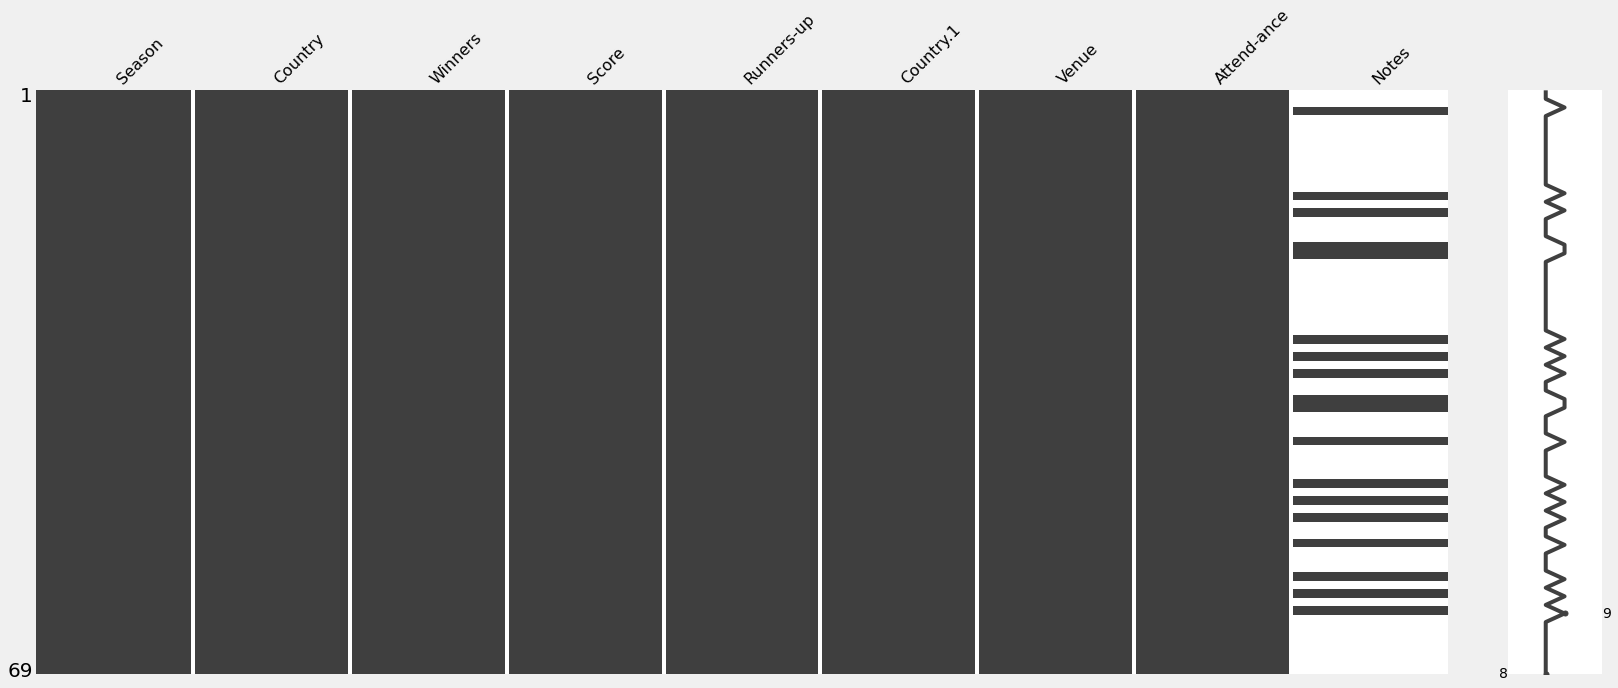

In [12]:
msno.matrix(finals)

## Formatting columns

### all_time dataset

Goals column has some issues because it is inconsistent with the Goal Diffrence column. We drop both.
Moreover, Pt. column does not correspond to 3W+1D+0L so we will create a new column respecting this rule.

In [13]:
all_time.drop(['goals','Dif','Pt.'],axis=1,inplace=True)

In [14]:
# Add Points column
all_time['Points']=pd.Series(all_time['W']*3+all_time['D']*1)

# Add win, draw and loss ratio columns
all_time['W %']=100*all_time['W']/all_time['M.']
all_time['D %']=100*all_time['D']/all_time['M.']
all_time['L %']=100*all_time['L']/all_time['M.']

# Add win/loss ratio column
all_time['W/L ratio']=all_time['W %']/all_time['L %']

# Rename column
all_time.rename(columns={'M.':'Matches'},inplace=True)

### finals dataset

In [15]:
# Add winners' goals, runners-up's goals and total goals columns
finals['win_score']=finals['Score'].apply(lambda x: int(x.split('–')[0]))
finals['run_score']=finals['Score'].apply(lambda x: int(x.split('–')[1]))
finals['tot_goals']=finals['win_score']+finals['run_score']

#fill nan values in the Notes colums
finals['Notes'].fillna('Match was won during regular time',inplace=True)

#Add a column Year
finals['Year']=finals['Season'].apply(lambda x: int(x.split('–')[0])+1)

In [16]:
#Rename some columns
finals.rename(columns={'Attend­ance':'Attendance','Country.1':'Country 2'},inplace=True)

In [17]:
#This function saves the last word after comma in the Venue column for each row
finals['Venue'] = finals['Venue'].apply(lambda x: x.split(',')[-1].strip())
#Convert string Attendance to float
finals['Attendance'] = finals['Attendance'].apply(lambda x: float(x.replace(',','')))

# Overview statistics

In [18]:
all_time.head()

,Team,Matches,W,D,L,Points,W %,D %,L %,W/L ratio
0,Real Madrid,486,291,85,110,958,59.876543,17.489712,22.633745,2.645455
1,Bayern Munich,388,231,78,79,771,59.536082,20.103093,20.360825,2.924051
2,FC Barcelona,341,196,77,68,665,57.478006,22.580645,19.941349,2.882353
3,Manchester United,289,153,69,67,528,52.941176,23.875433,23.183391,2.283582
4,Juventus,297,151,68,78,521,50.841751,22.895623,26.262626,1.935897


In [19]:
all_time.describe()

,Matches,W,D,L,Points,W %,D %,L %,W/L ratio
count,354.000000,354.000000,354.000000,354.000000,354.000000,354.000000,354.000000,354.000000,353.00
mean,33.254237,13.039548,7.169492,13.039548,46.288136,25.694297,19.311845,54.973344,inf
std,61.581865,31.468472,13.729255,18.669137,107.450873,19.785070,16.293620,24.449384,NaN
min,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00
25%,4.000000,0.000000,0.000000,2.000000,3.000000,0.000000,0.000000,36.592072,0.00
50%,8.000000,2.000000,2.000000,5.000000,9.000000,25.000000,18.181818,50.000000,0.52
75%,31.500000,9.000000,6.000000,14.000000,35.000000,41.328600,26.626506,71.279762,1.00
max,486.000000,291.000000,85.000000,110.000000,958.000000,83.333333,100.000000,100.000000,inf


In [20]:
finals.head()

,Season,Country,Winners,Score,Runners-up,Country 2,Venue,Attendance,Notes,win_score,run_score,tot_goals,Year
0,1955–56,Spain,Real Madrid,4–3,Reims,France,France,38239.0,Match was won during regular time,4,3,7,1956
1,1956–57,Spain,Real Madrid,2–0,Fiorentina,Italy,Spain,124000.0,Match was won during regular time,2,0,2,1957
2,1957–58,Spain,Real Madrid,3–2,AC Milan,Italy,Belgium,67000.0,Match was won during extra time,3,2,5,1958
3,1958–59,Spain,Real Madrid,2–0,Reims,France,West Germany,72000.0,Match was won during regular time,2,0,2,1959
4,1959–60,Spain,Real Madrid,7–3,Eintracht Frankfurt,West Germany,Scotland,127621.0,Match was won during regular time,7,3,10,1960


In [21]:
finals.describe(include='object')

,Season,Country,Winners,Score,Runners-up,Country 2,Venue,Notes
count,69,69,69,69,69,69,69,69
unique,68,11,23,14,36,14,18,4
top,1973–74,Spain,Real Madrid,1–0,Juventus,Italy,Italy,Match was won during regular time
freq,2,19,14,19,7,17,9,51


- 1973-1974 was a strange season with "two finals". Read more [here](https://it.wikipedia.org/wiki/Finale_della_Coppa_dei_Campioni_1973-1974).

- Real Madrid dominates the competition with 14 titles.
- Juventus is the "best" runners-up team.
- The most common score is 1-0 which occurred 19 times out of 69.
- Penalty shoot-out was necessary 11 times to declare a winner.

# Exploratory Data Analysis

### ALL TIME PERFORMANCES

In [22]:
top10=all_time.sort_values(by='Matches',ascending=False).head(10)
top10.head()

,Team,Matches,W,D,L,Points,W %,D %,L %,W/L ratio
0,Real Madrid,486,291,85,110,958,59.876543,17.489712,22.633745,2.645455
1,Bayern Munich,388,231,78,79,771,59.536082,20.103093,20.360825,2.924051
2,FC Barcelona,341,196,77,68,665,57.478006,22.580645,19.941349,2.882353
4,Juventus,297,151,68,78,521,50.841751,22.895623,26.262626,1.935897
3,Manchester United,289,153,69,67,528,52.941176,23.875433,23.183391,2.283582


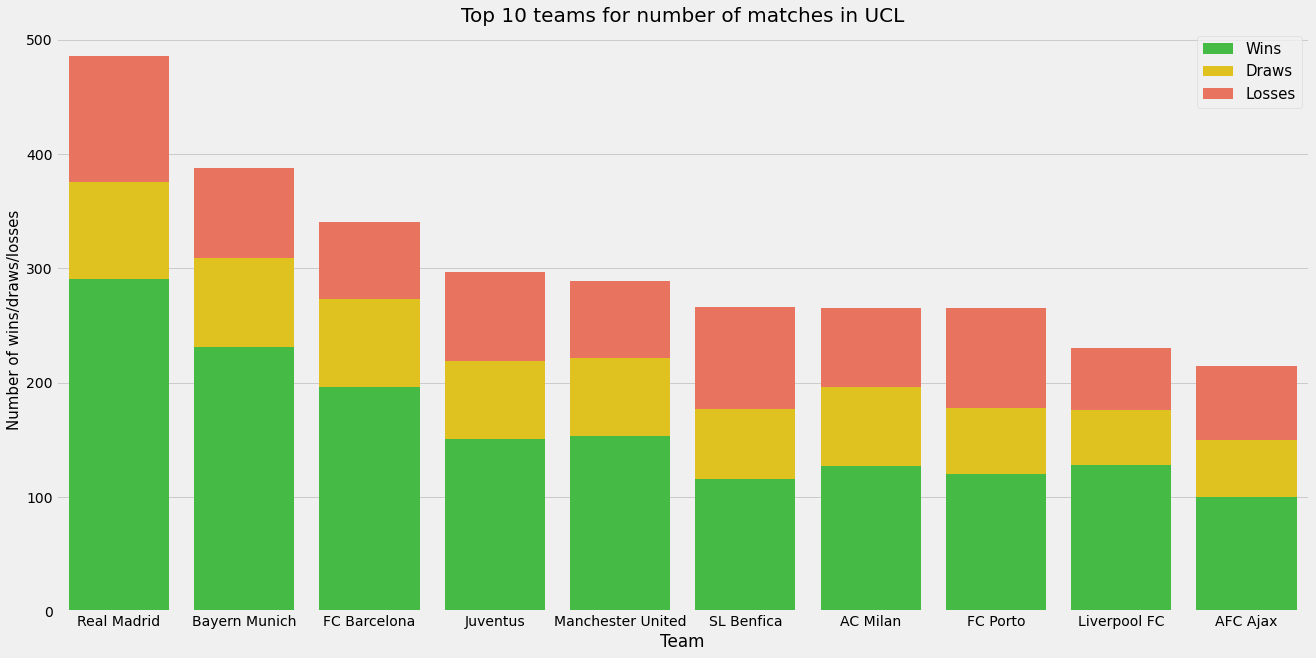

In [23]:
fig, ax = plt.subplots(figsize=(20, 10))

plt.title('Top 10 teams for number of matches in UCL',fontsize=20)

# Plot 'W' (wins) as the bottom bars
sns.barplot(data=top10, x='Team', y='W', ax=ax, color='limegreen', label='Wins')

# Plot 'D' (draws) on top of 'W' (stacked bars)
sns.barplot(data=top10, x='Team', y='D', ax=ax, color='gold', label='Draws', bottom=top10['W'])

# Plot 'L' (losses) on top of 'D' (stacked bars)
sns.barplot(data=top10, x='Team', y='L', ax=ax, color='tomato', label='Losses', 
            bottom=top10['W']+top10['D'])

plt.ylabel('Number of wins/draws/losses',fontsize=15)
plt.legend(fontsize=15)

Despite Real Madrid is the team with the largest number of victories in the UCL, it is not the team with the lowest rate of losses. 
Let's examine this aspect.

Text(0, 0.5, '% of losses')

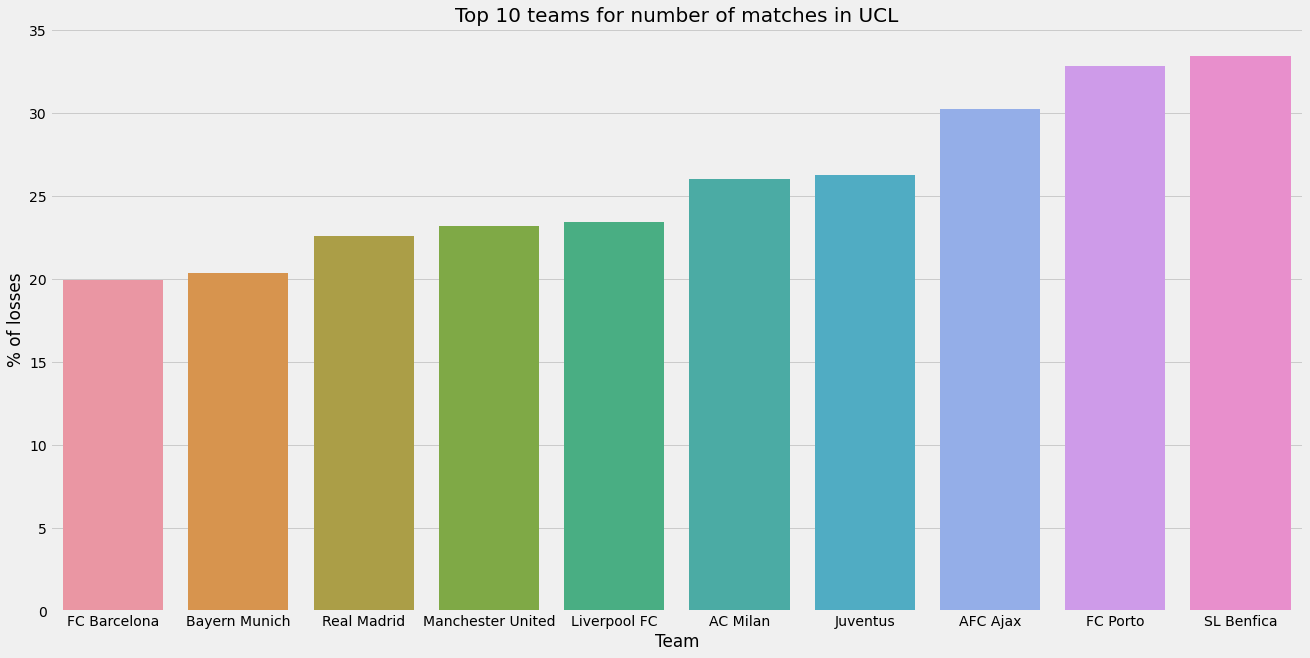

In [24]:
fig, ax = plt.subplots(figsize=(20, 10))

plt.title('Top 10 teams for number of matches in UCL',fontsize=20)
# Plot 'W' (wins) as the bottom bars
sns.barplot(data=top10.sort_values(by='L %'), x='Team', y='L %', ax=ax, label='% Wins')
plt.ylabel('% of losses')

Indeed, FC Barcelona and Bayern Munich are the best team with respect to the loss ratio. However, Real Madrid is still in third position despite more than 100 extra matches.

Another key feature to evaluate is the ratio between wins and losses.

In [25]:
all_time.sort_values(by='W/L ratio',ascending=False)

,Team,Matches,W,D,L,Points,W %,D %,L %,W/L ratio
206,Zbrojovka Brno,4,1,3,0,6,25.000000,75.000000,0.000000,inf
140,FC Ararat,6,5,0,1,15,83.333333,0.000000,16.666667,5.00
147,AFC DWS,6,4,1,1,13,66.666667,16.666667,16.666667,4.00
98,1. FC Köln,17,7,8,2,29,41.176471,47.058824,11.764706,3.50
74,Spartak Trnava,24,13,7,4,46,54.166667,29.166667,16.666667,3.25
...,...,...,...,...,...,...,...,...,...,...
291,FC Lausanne-Sport,2,0,1,1,1,0.000000,50.000000,50.000000,0.00
290,St Patrick's Athletic,2,0,1,1,1,0.000000,50.000000,50.000000,0.00
289,Rot-Weiss Essen,2,0,1,1,1,0.000000,50.000000,50.000000,0.00
353,Avenir Beggen,8,0,0,8,0,0.000000,0.000000,100.000000,0.00


We need to put a threshold value on the number of matches, otherwise this table would be unreliable. We selected 50 but it is arbitrary.

In [26]:
thresh_val=50

In [27]:
top10_wl_ratio=all_time[all_time['Matches']>thresh_val]
top10_wl_ratio=top10_wl_ratio.sort_values(by='W/L ratio',ascending=False).head(10)
top10_wl_ratio

,Team,Matches,W,D,L,Points,W %,D %,L %,W/L ratio
1,Bayern Munich,388,231,78,79,771,59.536082,20.103093,20.360825,2.924051
2,FC Barcelona,341,196,77,68,665,57.478006,22.580645,19.941349,2.882353
0,Real Madrid,486,291,85,110,958,59.876543,17.489712,22.633745,2.645455
16,Manchester City,127,72,26,29,242,56.692913,20.472441,22.834646,2.482759
6,Liverpool FC,230,128,48,54,432,55.652174,20.869565,23.478261,2.370370
9,Chelsea FC,197,101,52,44,355,51.269036,26.395939,22.335025,2.295455
3,Manchester United,289,153,69,67,528,52.941176,23.875433,23.183391,2.283582
4,Juventus,297,151,68,78,521,50.841751,22.895623,26.262626,1.935897
5,AC Milan,265,127,69,69,450,47.924528,26.037736,26.037736,1.840580
15,Paris Saint-Germain,151,79,29,43,266,52.317881,19.205298,28.476821,1.837209


Text(0, 0.5, '% W/L')

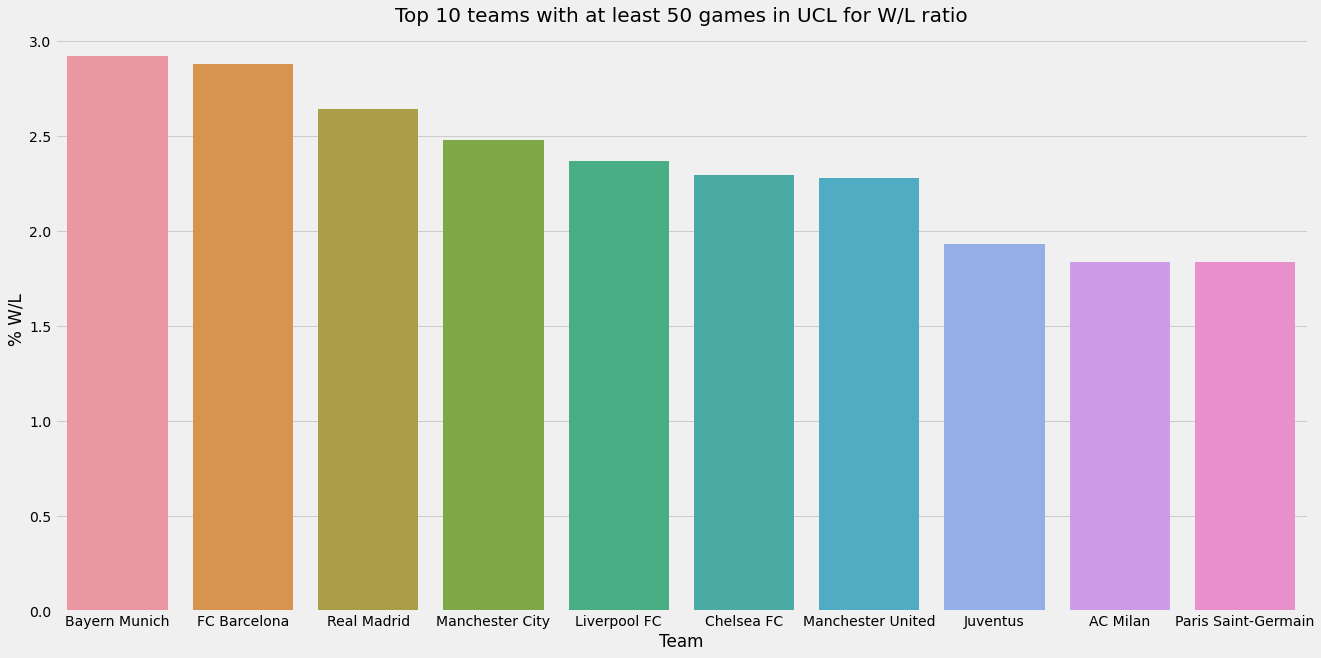

In [28]:
fig, ax = plt.subplots(figsize=(20, 10))

plt.title('Top 10 teams with at least 50 games in UCL for W/L ratio',fontsize=20)
# Plot 'W' (wins) as the bottom bars
sns.barplot(data=top10_wl_ratio, x='Team', y='W/L ratio',  label='W/L ratio')
plt.ylabel('% W/L')

Again we find that Bayern Munich and FC Barcelona are the best team for W/L ratio with Real Madrid in third position. We notice the presence of new teams in this rank like Manchester City, Chelsea FC and Atletico Madrid.

Now we can ask which are the teams that played at least 50 games with the worst W/L ratio. 

In [29]:
worst10_wl_ratio=all_time[all_time['Matches']>thresh_val]
worst10_wl_ratio=worst10_wl_ratio.sort_values(by='W/L ratio',ascending=True).head(10)
worst10_wl_ratio

,Team,Matches,W,D,L,Points,W %,D %,L %,W/L ratio
93,Dinamo Zagreb,54,8,9,37,33,14.814815,16.666667,68.518519,0.216216
76,AEK Athen,56,9,19,28,46,16.071429,33.928571,50.000000,0.321429
64,Beşiktaş,70,17,13,40,64,24.285714,18.571429,57.142857,0.425000
49,Rosenborg BK,90,21,21,48,84,23.333333,23.333333,53.333333,0.437500
60,Fenerbahçe,73,20,10,43,70,27.397260,13.698630,58.904110,0.465116
68,Malmö FF,53,14,11,28,53,26.415094,20.754717,52.830189,0.500000
46,CSKA Moskva,86,23,20,43,89,26.744186,23.255814,50.000000,0.534884
23,Galatasaray,161,43,41,77,170,26.708075,25.465839,47.826087,0.558442
43,Sporting CP,92,28,15,49,99,30.434783,16.304348,53.260870,0.571429
24,Olympiakos Piraeus,156,47,28,81,169,30.128205,17.948718,51.923077,0.580247


Text(0, 0.5, '% W/L')

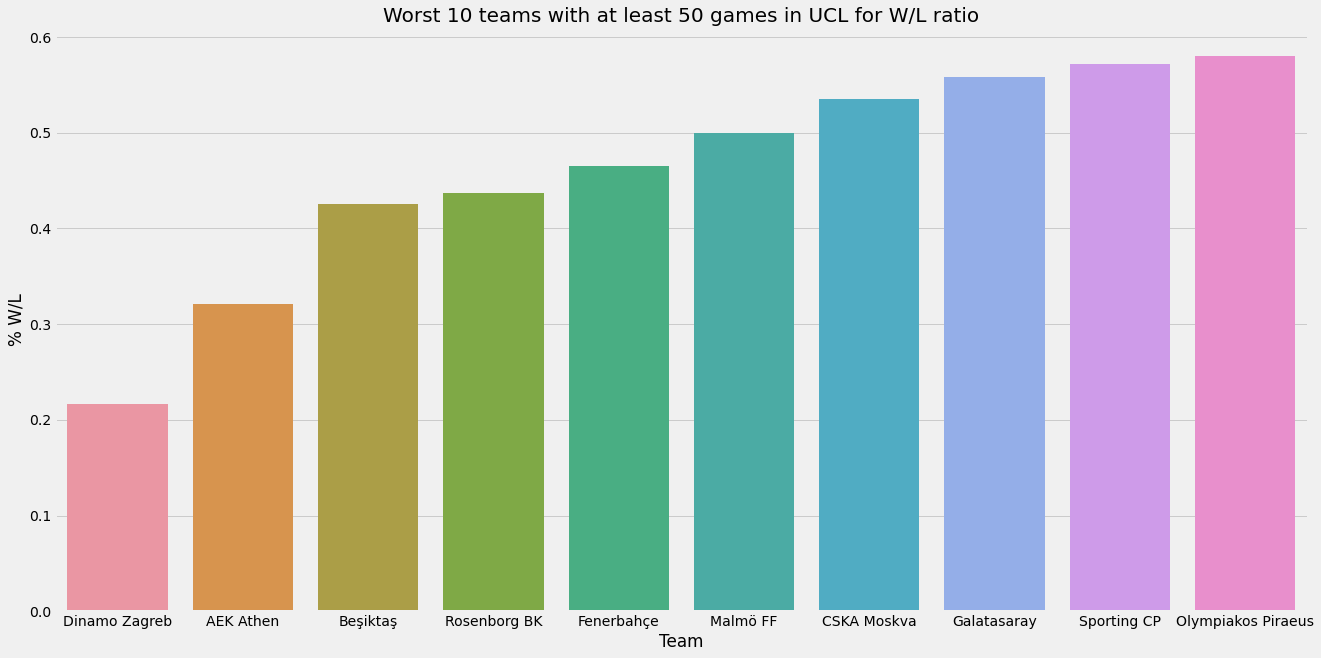

In [30]:
fig, ax = plt.subplots(figsize=(20, 10))

plt.title('Worst 10 teams with at least 50 games in UCL for W/L ratio',fontsize=20)
# Plot 'W' (wins) as the bottom bars
sns.barplot(data=worst10_wl_ratio, x='Team', y='W/L ratio',  label='W/L ratio')
plt.ylabel('% W/L')

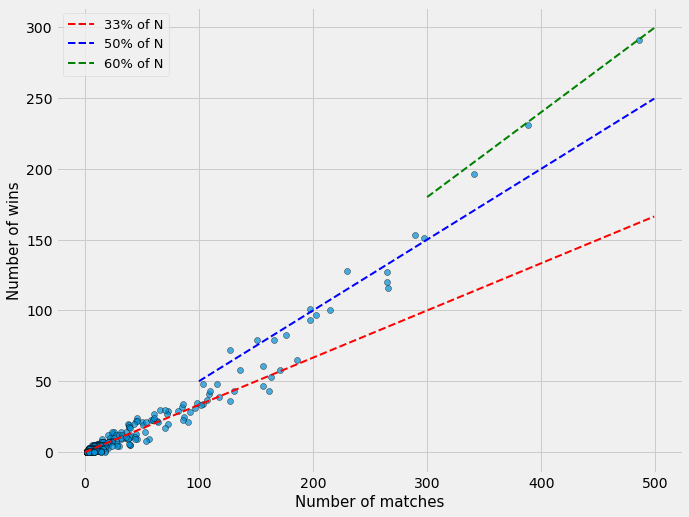

In [31]:
x_data=np.arange(0,500,1)
plt.figure(figsize=(10,8))
plt.scatter(all_time['Matches'],all_time['W'],edgecolors='k',alpha=0.7)
plt.xlabel('Number of matches',fontsize=15)
plt.ylabel('Number of wins',fontsize=15)
plt.plot(x_data,[x/3 for x in x_data],lw=2,linestyle='--',c='red',label='33% of N')
plt.plot(x_data[100:],[x/2 for x in x_data[100:]],lw=2,linestyle='--',c='blue',label='50% of N')
plt.plot(x_data[300:],[6*x/10 for x in x_data[300:]],lw=2,linestyle='--',c='green',label='60% of N')
plt.legend(fontsize=13)

We notice that the trend is not just a simple reflection of the Law of large numbers, i.e. the number of wins tends to the probability fraction of the event times the number of cases. If it was the case then the probability to win is 1/3. Thus after 500 matches one would expect Real Madrid to win $500/3\approx 167$ games. However Real Madrid has won 291 matches out of 486 ($\approx 59%$ win rate). This means that the more games a team plays, the more experience it gains.  From the plot above we see that till $\approx 100$ games, number of wins is nearly 1/3 of the number of matches. From $\approx 100$ games, it's like teams acquired enough experience to face with UCL games. 

Let's test which function better describe the distribution of (N matches, N wins)

In [32]:
from scipy.optimize import curve_fit
from sklearn.metrics import mean_squared_error, r2_score

In [33]:
# Linear function
def linear_func(x, a, b):
    return a * x + b

# Quadratic function
def quadratic_func(x, a, b, c):
    return a * x**2 + b * x + c

In [34]:
# Fit each function to the data
popt_linear, _ = curve_fit(linear_func, all_time['Matches'], all_time['W'])
popt_quadratic, _ = curve_fit(quadratic_func, all_time['Matches'], all_time['W'])

In [35]:
Y_pred_linear = linear_func(all_time['Matches'], *popt_linear)
Y_pred_quadratic = quadratic_func(all_time['Matches'], *popt_quadratic)

# Calculate fit metrics
def evaluate_fit(y_true, y_pred):
    mse = mean_squared_error(y_true, y_pred)
    r2 = r2_score(y_true, y_pred)
    return mse, r2

metrics = {
    "Linear": evaluate_fit(all_time['W'], Y_pred_linear),
    "Quadratic": evaluate_fit(all_time['W'], Y_pred_quadratic),
}

for func_name, (mse, r2) in metrics.items():
    print(f"{func_name} - MSE: {mse:.4f}, R-squared: {r2:.4f}")

Linear - MSE: 49.0233, R-squared: 0.9504
Quadratic - MSE: 19.4601, R-squared: 0.9803


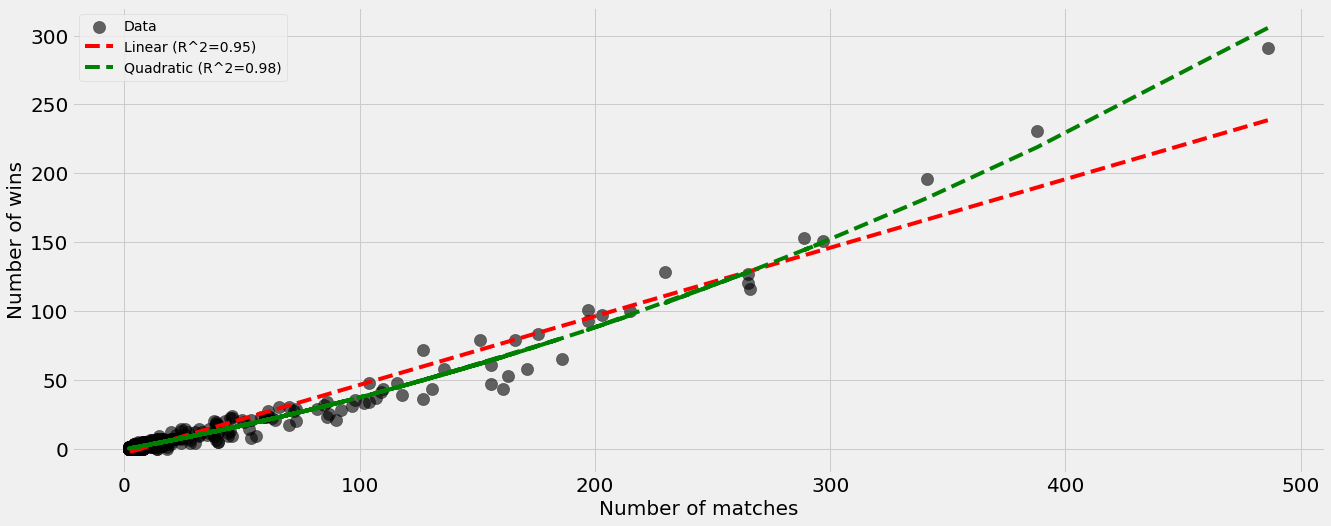

In [36]:
plt.figure(figsize=(20,8))
plt.scatter(all_time['Matches'], all_time['W'], label="Data", color='black',alpha=0.6,s=150)

plt.plot(all_time['Matches'], Y_pred_linear, label=f"Linear (R^2={metrics['Linear'][1]:.2f})", color='red',linestyle='--')
plt.plot(all_time['Matches'], Y_pred_quadratic, label=f"Quadratic (R^2={metrics['Quadratic'][1]:.2f})", 
         color='green',linestyle='--')
#plt.plot(all_time['Matches'], Y_pred_exponential, label=f"Exponential (R^2={metrics['Exponential'][1]:.2f})", color='blue')

plt.xlabel('Number of matches',fontsize=20)
plt.ylabel('Number of wins',fontsize=20)
plt.tick_params(axis='both',labelsize=20)
plt.legend()
plt.show()

## Finals

Let's check which are the top 5 team in UCL for the number of won and lost finals.

In [37]:
top_winners = finals['Winners'].value_counts().head(5)
top_winners_df = top_winners.reset_index()
top_winners_df.columns = ['Team', 'Wins']

top_runners = finals['Runners-up'].value_counts().head(5)
top_runners_df = top_runners.reset_index()
top_runners_df.columns = ['Team', 'Losses']

Text(0, 0.5, '')

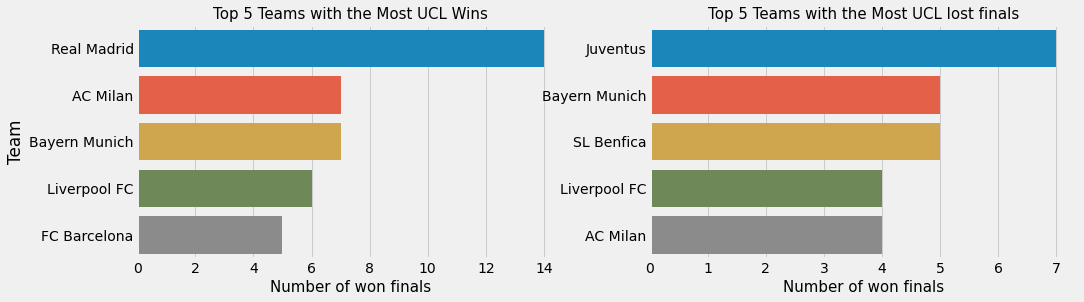

In [158]:
fig,ax=plt.subplots(nrows=1,ncols=2,figsize=(15,4))

ax[0].set_title('Top 5 Teams with the Most UCL Wins',fontsize=15)
sns.barplot(data=top_winners_df, x='Wins', y='Team',orientation='horizontal',ax=ax[0])
ax[0].set_xlabel('Number of won finals',fontsize=15)
#ax[0].yticks(rotation=45)

ax[1].set_title('Top 5 Teams with the Most UCL lost finals',fontsize=15)
sns.barplot(data=top_runners_df, x='Losses', y='Team',orientation='horizontal',ax=ax[1])
ax[1].set_xlabel('Number of won finals',fontsize=15)
ax[1].set_ylabel('')

Let's study the number of goals in the UCL finals.

(array([0, 1, 2, 3, 4]),
 [Text(0, 0, '1–0'),
  Text(0, 1, '2–1'),
  Text(0, 2, '2–0'),
  Text(0, 3, '1–1'),
  Text(0, 4, '3–1')])

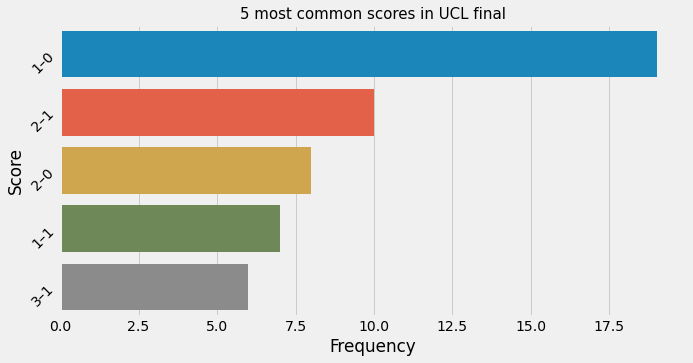

In [39]:
top_scores = finals['Score'].value_counts().head(5)
top_scores_df = top_scores.reset_index()
top_scores_df.columns = ['Score', 'Frequency']

plt.figure(figsize=(10,5))
sns.barplot(data=top_scores_df,x='Frequency',y='Score',orientation='horizontal')
plt.title('5 most common scores in UCL final',fontsize=15)
plt.yticks(rotation=45)

(array([ 4., 19., 15., 12.,  9.,  6.,  1.,  1.,  1.,  1.]),
 array([ 0.,  1.,  2.,  3.,  4.,  5.,  6.,  7.,  8.,  9., 10.]),
 <BarContainer object of 10 artists>)

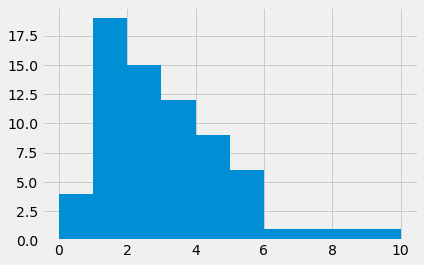

In [40]:
plt.hist(finals['tot_goals'],bins=10)

In [41]:
stats.shapiro(finals['tot_goals'])

ShapiroResult(statistic=0.8833584785461426, pvalue=1.032200270856265e-05)

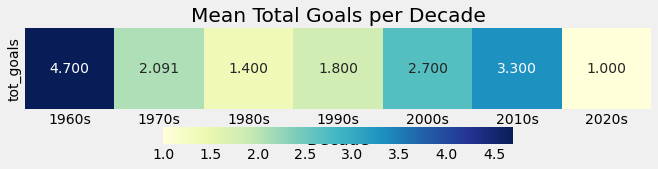

In [42]:
bins = [1960, 1970, 1980, 1990, 2000, 2010, 2020, 2030]
labels = ['1960s', '1970s', '1980s', '1990s', '2000s', '2010s', '2020s']

finals['Decade'] = pd.cut(finals['Year'], bins=bins, labels=labels, right=False)

mean_attendance_per_decade = finals.groupby('Decade')['tot_goals'].mean().reset_index()

heatmap_data = mean_attendance_per_decade.set_index('Decade').T

plt.figure(figsize=(10, 2))
sns.heatmap(heatmap_data, annot=True, fmt=".3f", cmap="YlGnBu", cbar=True, cbar_kws={'orientation': 'horizontal'})
plt.title('Mean Total Goals per Decade')
plt.xlabel('Decade')
plt.ylabel('')
plt.show()

In [43]:
finals['Notes'].value_counts()

Match was won during regular time       51
Match was won on a penalty shoot-out    11
Match was won during extra time          5
Match was won after a replay             2
Name: Notes, dtype: int64

([<matplotlib.patches.Wedge at 0x2071fb16ca0>,
 [Text(-0.7508084640855961, 0.8039195545932617, '90 min'),
  Text(0.4610942097246547, -0.9986952136454826, 'Penalty'),
  Text(1.0089324539555091, -0.43824114749223914, 'Extra-time'),
  Text(1.0954425312976865, -0.10002829911638643, 'Replay')],
 [Text(-0.4095318895012342, 0.4385015752326881, '73.9%'),
  Text(0.25150593257708437, -0.5447428438066269, '15.9%'),
  Text(0.5503267930666413, -0.2390406259048577, '7.2%'),
  Text(0.5975141079805563, -0.05456089042711986, '2.9%')])

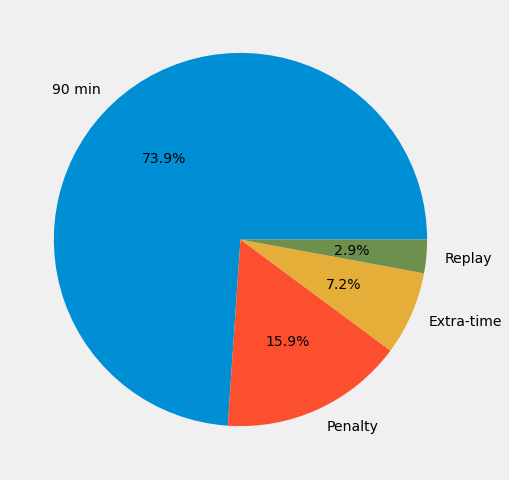

In [44]:
labels=['90 min','Penalty','Extra-time','Replay']
plt.figure(figsize=(8,8))
plt.pie(finals['Notes'].value_counts(),labels=labels, autopct='%1.1f%%')

In [45]:
finals.groupby('Winners')['win_score'].mean()

Winners
AC Milan               2.428571
AFC Ajax               1.500000
Aston Villa            1.000000
Bayern Munich          1.714286
Borussia Dortmund      3.000000
Celtic FC              2.000000
Chelsea FC             1.000000
Crvena Zvezda          0.000000
FC Barcelona           2.200000
FC Porto               2.500000
Feyenoord              2.000000
Hamburger SV           1.000000
Inter Milan            2.000000
Juventus               1.000000
Liverpool FC           1.833333
Manchester City        1.000000
Manchester United      2.333333
Nottingham Forest      1.000000
Olympique Marseille    1.000000
PSV Eindhoven          0.000000
Real Madrid            2.785714
SL Benfica             4.000000
Steaua București       0.000000
Name: win_score, dtype: float64

In [46]:
finals.groupby('Winners')['win_score'].sum()

Winners
AC Milan               17
AFC Ajax                6
Aston Villa             1
Bayern Munich          12
Borussia Dortmund       3
Celtic FC               2
Chelsea FC              2
Crvena Zvezda           0
FC Barcelona           11
FC Porto                5
Feyenoord               2
Hamburger SV            1
Inter Milan             6
Juventus                2
Liverpool FC           11
Manchester City         1
Manchester United       7
Nottingham Forest       2
Olympique Marseille     1
PSV Eindhoven           0
Real Madrid            39
SL Benfica              8
Steaua București        0
Name: win_score, dtype: int64

### Attendance

Text(2009, 10000, 'Covid-19 Pandemic')

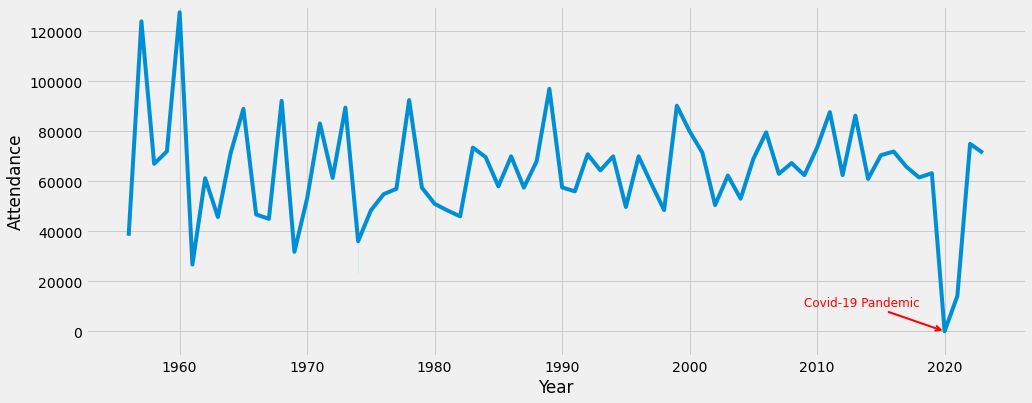

In [203]:
plt.figure(figsize=(15,6))

plt.ylim(-10000,130000)
sns.lineplot(data=finals,x='Year',y='Attendance')

plt.annotate(
    'Covid-19 Pandemic',                # Annotation text
    xy=(2020, 0),             # Point to annotate
    xytext=(2009,10000),# Text location
    arrowprops=dict(edgecolor='red',facecolor='red', arrowstyle='->',lw=2),  # Arrow properties
    fontsize=12,                       # Font size
    color='red'                      # Font color
)

In [140]:
mean_attendance=finals.groupby('Country')['Attendance'].mean()
top5_countries = mean_attendance.sort_values(ascending=False).head(5)

mean_attendance_venue=finals.groupby('Venue')['Attendance'].mean()
top5_venues = mean_attendance_venue.sort_values(ascending=False).head(5)

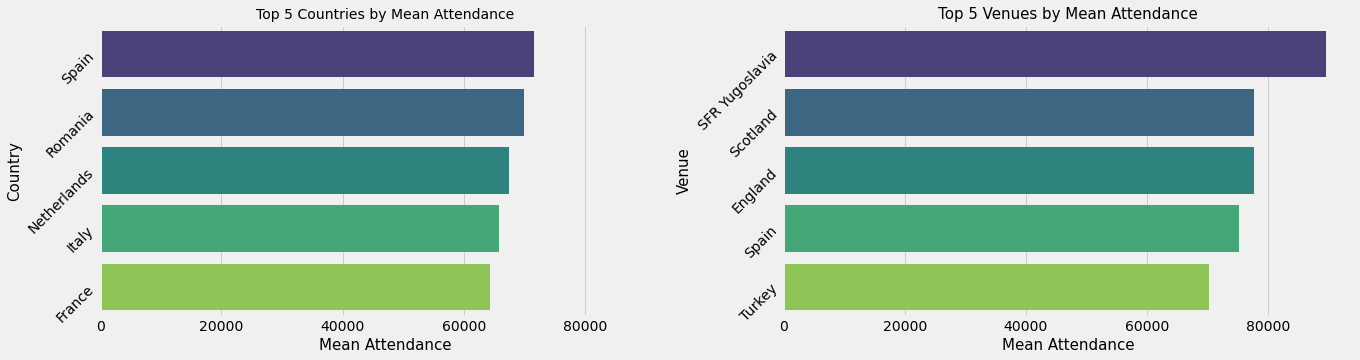

In [162]:
fig,ax=plt.subplots(nrows=1,ncols=2,figsize=(20,5),sharex=True)

sns.barplot(y=top5_countries.index, x=top5_countries.values, palette='viridis',orientation='horizontal',ax=ax[0])

# Customize plot
ax[0].set_ylabel('Country', fontsize=15)
ax[0].set_xlabel('Mean Attendance', fontsize=15)
ax[0].set_title('Top 5 Countries by Mean Attendance', fontsize=14)
ax[0].tick_params(axis="y", rotation=45) 

sns.barplot(y=top5_venues.index, x=top5_venues.values, palette='viridis',orientation='horizontal',ax=ax[1])

ax[1].set_ylabel('Venue', fontsize=15)
ax[1].set_xlabel('Mean Attendance', fontsize=15)
ax[1].set_title('Top 5 Venues by Mean Attendance', fontsize=15)
ax[1].tick_params(axis="y", rotation=45) 

In [170]:
finals['Country'].value_counts()

Spain           19
England         15
Italy           12
Netherlands      6
West Germany     5
Portugal         4
Germany          4
Scotland         1
Romania          1
Yugoslavia       1
France           1
Name: Country, dtype: int64

In [173]:
#Select only countries with at least 5 UCL finals

value_counts = finals['Country'].value_counts()
countries_to_keep = value_counts[value_counts > 5].index
filtered_countries = finals[finals['Country'].isin(countries_to_keep)]

#Select only venues with at least 5 UCL finals

value_counts = finals['Venue'].value_counts()
venues_to_keep = value_counts[value_counts > 5].index
filtered_venues = finals[finals['Venue'].isin(venues_to_keep)]

In [174]:
mean_attendance=filtered_countries.groupby('Country')['Attendance'].mean()
filtered_top5_countries = mean_attendance.sort_values(ascending=False).head(5)

mean_attendance_venue=filtered_venues.groupby('Venue')['Attendance'].mean()
filtered_top5_venues = mean_attendance_venue.sort_values(ascending=False).head(5)

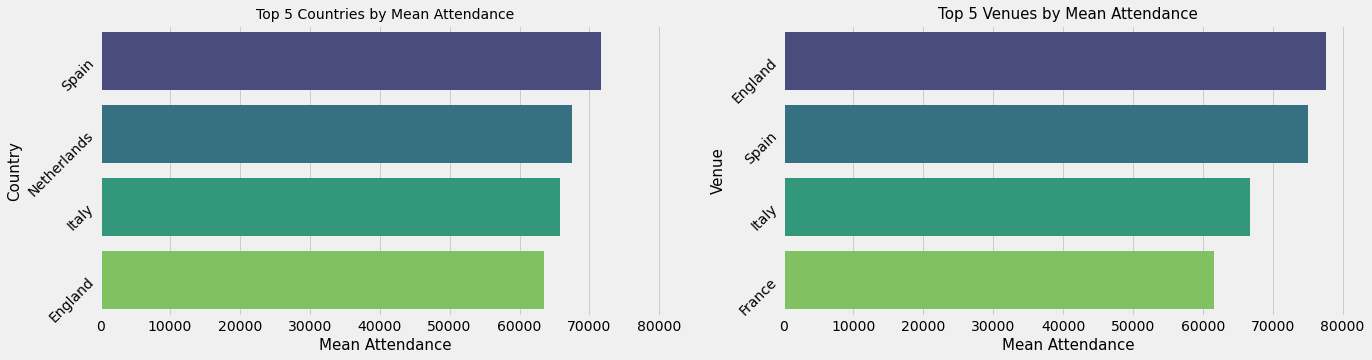

In [175]:
fig,ax=plt.subplots(nrows=1,ncols=2,figsize=(20,5),sharex=True)

sns.barplot(y=filtered_top5_countries.index, x=filtered_top5_countries.values, palette='viridis',orientation='horizontal',ax=ax[0])

# Customize plot
ax[0].set_ylabel('Country', fontsize=15)
ax[0].set_xlabel('Mean Attendance', fontsize=15)
ax[0].set_title('Top 5 Countries by Mean Attendance', fontsize=14)
ax[0].tick_params(axis="y", rotation=45) 

sns.barplot(y=filtered_top5_venues.index, x=filtered_top5_venues.values, palette='viridis',orientation='horizontal',ax=ax[1])

ax[1].set_ylabel('Venue', fontsize=15)
ax[1].set_xlabel('Mean Attendance', fontsize=15)
ax[1].set_title('Top 5 Venues by Mean Attendance', fontsize=15)
ax[1].tick_params(axis="y", rotation=45) 

I want to check if `Attendance` is somehow affected by the fact one of the two teams are playing in their country.

In [49]:
finals['same_country']=(finals['Country']==finals['Venue'])|(finals['Country 2']==finals['Venue'])

Text(0.5, 0, 'Same country')

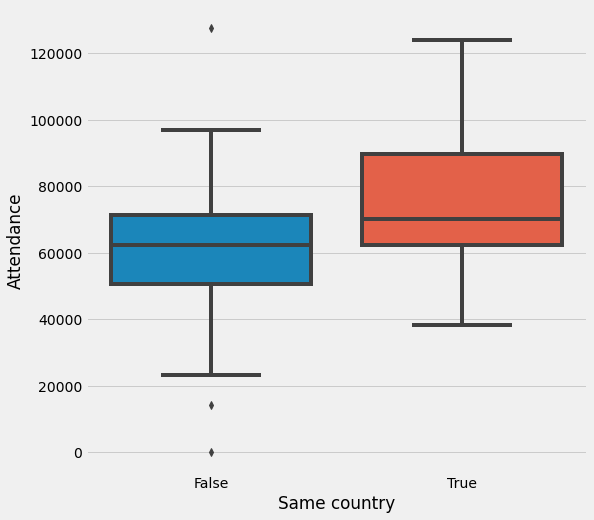

In [50]:
plt.figure(figsize=(8,8))
sns.boxplot(data=finals,x='same_country',y='Attendance')
plt.xlabel('Same country')

There is a clear statistical difference between Attendance if one of the two teams are playing home or not.

The outlier at "127621" corresponds to 1959-1960 UCL Final between Real Madrid - Eintracht Frankfurt (7-3) which took place in Scotland. 

Let's perform a hypothesis test.

In [51]:
sample1=finals[finals['same_country']==True]['Attendance']
sample2=finals[finals['same_country']==False]['Attendance']

stats.kstest(sample1,sample2)

KstestResult(statistic=0.35526315789473684, pvalue=0.12797488695714176)

# Does playing home affect the result?

I want to check if there are any psychological advantages for a team playing UCL final in its own country.

To do this I need to add in `finals` a boolean column "same_country_win" which is `True` if the winners played the final in their country and `False` if not.

Similarly I need to add in `finals` a boolean column "same_country_loss" which is `True` if the runners-up played the final in their country and `False` if not.

In [52]:
finals['same_country_win']=finals['Country']==finals['Venue']
finals['same_country_loss']=finals['Country 2']==finals['Venue']

Let's make a pie chart to understand the proportion between home wins and home losses

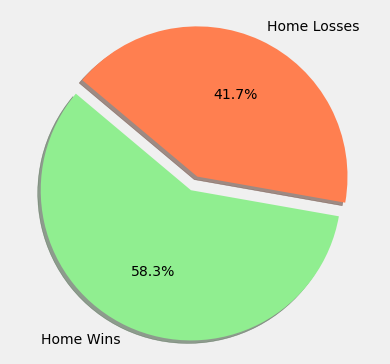

In [53]:
labels = ['Home Wins', 'Home Losses']
sizes = [sum(finals['same_country_win']), sum(finals['same_country_loss'])]
colors = ['lightgreen', 'coral']
explode = (0.1, 0)  # explode 1st slice

# Plotting the pie chart
plt.figure(figsize=(6,6))
plt.pie(sizes, explode=explode, labels=labels, colors=colors, autopct='%1.1f%%', shadow=True, startangle=140)

# Equal aspect ratio ensures that pie is drawn as a circle.
plt.axis('equal')

# Display the plot
plt.show()

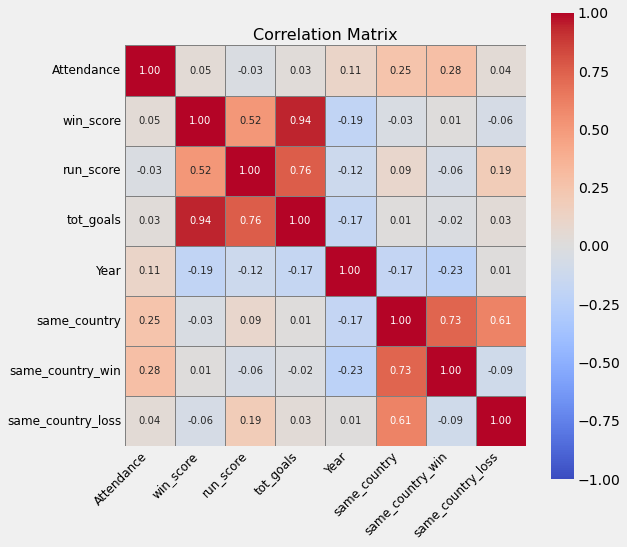

In [54]:
plt.figure(figsize=(8,8))
sns.heatmap(finals.corr(method='spearman'), 
            annot=True,           # Annotate the cells with the correlation values
            fmt='.2f',            # Format the annotation text (two decimal places)
            cmap='coolwarm',      # Choose a color map
            cbar=True,            # Show the color bar
            square=True,          # Make each cell square-shaped
            linewidths=.5,        # Add space between the cells
            linecolor='gray',     # Color of the lines between cells
            annot_kws={"size": 10},# Annotation font size
            vmin=-1, vmax=1)      # Set the min and max values for the color scale

# Set titles and labels for clarity
plt.title('Correlation Matrix', fontsize=16)
plt.xticks(rotation=45, ha='right', fontsize=12)  # Rotate x-axis labels
plt.yticks(rotation=0, fontsize=12)               # Rotate y-axis labels

# Display the plot
plt.show()

In [118]:
#home_games contain all the goals scored by the home team in the final
home_games=pd.concat([finals[finals['same_country_win']]['win_score'], finals[finals['same_country_loss']]['run_score']], 
                     ignore_index=True)

#away_games contain all the goals scored by the visitor team in the final against a home team
away_games=pd.concat([finals[finals['same_country_win']]['run_score'], finals[finals['same_country_loss']]['win_score']], 
                     ignore_index=True)

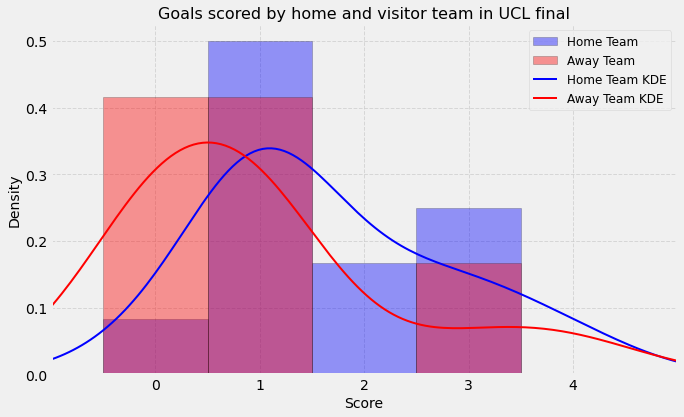

In [123]:
# Define bins and shift them slightly to the left
bins = [0, 1, 2, 3, 4]

# Create the plot
plt.figure(figsize=(10, 6))

# Plot the histograms centered on the left bin
plt.hist(home_games, bins=bins, alpha=0.4, color='blue', edgecolor='black', label='Home Team', density=True, align='left')
plt.hist(away_games, bins=bins, alpha=0.4, color='red', edgecolor='black', label='Away Team', density=True, align='left')

# Overplot KDE line distributions
sns.kdeplot(home_games, color='blue', lw=2, label='Home Team KDE')
sns.kdeplot(away_games, color='red', lw=2, label='Away Team KDE')

# Set x-ticks only for 0, 1, 2, 3, 4
plt.xticks([0, 1, 2, 3, 4])
plt.xlim(-1,5)

# Add titles and labels
plt.title('Goals scored by home and visitor team in UCL final', fontsize=16)
plt.xlabel('Score', fontsize=14)
plt.ylabel('Density', fontsize=14)

# Add a legend
plt.legend(loc='upper right', fontsize=12)

# Add gridlines
plt.grid(True, linestyle='--', alpha=0.7)

# Show plot
plt.show()